In [35]:

def BFS(graph, s, t, parent):
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True

    while queue:
        u = queue.pop(0)
        for ind in range(len(graph[u])):
            if visited[ind] is False and graph[u][ind] > 0:
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u

    return True if visited[t] else False

def FordFulkerson(graph, source, sink):
    parent = [-1] * (len(graph))
    max_flow = 0
    while BFS(graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink

        while s != source:
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]

        max_flow += path_flow
        v = sink

        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]

    return max_flow


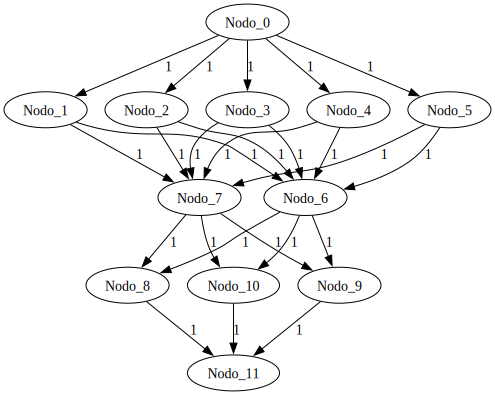

In [38]:
import graphviz as gv
import numpy as np

graph = [[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


from graphviz import Digraph

def dibujaGrafo(graph):
    dot = Digraph("Digrafo")

    nodos = [f'Nodo_{i}' for i in range(len(graph))] 

    for i in range(len(graph)):
        for j in range(len(graph[i])):
            weight = graph[i][j]
            if weight > 0:
                dot.node(nodos[i], label=nodos[i])
                dot.node(nodos[j], label=nodos[j])
                dot.edge(nodos[i], nodos[j], label=str(weight))

    return dot

GrafoOriginal = np.array(graph)
dibujaGrafo(GrafoOriginal)

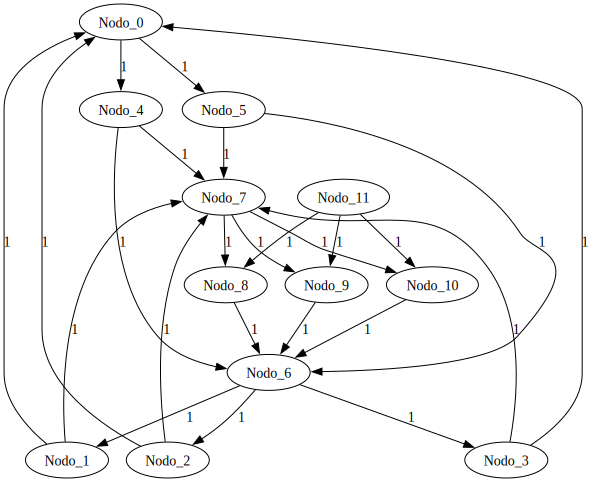

In [39]:
source, sink = 0, 11
GrafoResultante = np.array(graph)
max_flow = FordFulkerson(GrafoResultante, source, sink)

dibujaGrafo(GrafoResultante)